In [15]:
from autogluon.tabular import TabularDataset, TabularPredictor
import numpy as np
import math

In [25]:
train_data = TabularDataset(f'Data/phil_rangedata_train.csv')
train_data.head()

,initial_SOC,final_SOC,altitude,avg_speed,total_distance
0,100.000031,100.000031,-3.061713,7.642350,4585.410159
1,100.000031,100.000031,-0.397832,4.726447,2822.495564
2,100.000031,99.607872,-2.267668,5.793851,3476.310818
3,100.000031,99.215721,-10.155657,11.395269,6837.161613
4,99.607872,97.254936,-10.348317,19.169618,11486.297899


In [27]:
label = 'final_SOC'
train_data[label].describe()

count    1880.000000
mean       63.599423
std        24.515964
min        10.588239
25%        42.745113
50%        69.411789
75%        83.921593
max       100.000031
Name: final_SOC, dtype: float64

In [28]:
predictor = TabularPredictor(label=label,eval_metric='root_mean_squared_error').fit(
    train_data, 
    presets=['best_quality'], 
    time_limit = 60,
    verbosity=1) 

No path specified. Models will be saved in: "AutogluonModels/ag-20230421_051613/"
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])


In [29]:
test_data1 = TabularDataset(f'Data/phil_rangedata_test1.csv')
test_data1[label].describe()

y_pred1 = predictor.predict(test_data1.drop(columns=[label]))


In [30]:
predictor.evaluate(test_data1, silent=True)

/home/witvoetk/anaconda3/envs/tf/lib/python3.10/site-packages/autogluon/tabular/predictor/predictor.py:1420: FutureWarning: Calling `predictor.predict_proba` when problem_type=regression will raise an AssertionError starting in AutoGluon v0.8. Please call `predictor.predict` instead.
  warnings.warn(


{'root_mean_squared_error': -10.246317807531875,
 'mean_squared_error': -104.98702861294481,
 'mean_absolute_error': -7.612373828188478,
 'r2': 0.8951619258801004,
 'pearsonr': 0.9705234593050579,
 'median_absolute_error': -3.838729855078128}

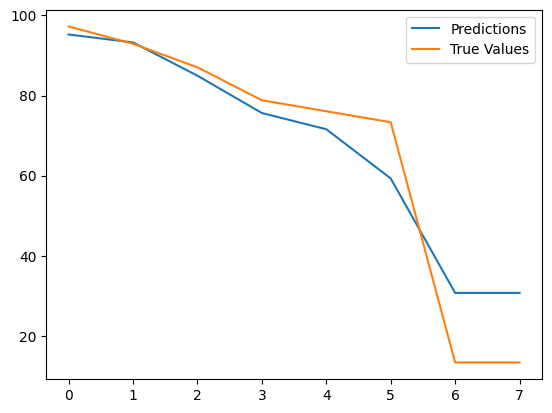

In [31]:
import matplotlib.pyplot as plt
#plot the predicted vs true values for test data1
plt.plot(y_pred1, label="Predictions")
plt.plot(test_data1[label], label="True Values")
plt.legend()
plt.show()

In [32]:
#test test data 2
test_data2 = TabularDataset(f'Data/phil_rangedata_test2.csv')
y_pred2 = predictor.predict(test_data2.drop(columns=[label]))

predictor.evaluate(test_data2, silent=True)

/home/witvoetk/anaconda3/envs/tf/lib/python3.10/site-packages/autogluon/tabular/predictor/predictor.py:1420: FutureWarning: Calling `predictor.predict_proba` when problem_type=regression will raise an AssertionError starting in AutoGluon v0.8. Please call `predictor.predict` instead.
  warnings.warn(


{'root_mean_squared_error': -1.6121556437889484,
 'mean_squared_error': -2.5990458198005584,
 'mean_absolute_error': -1.5237576179516594,
 'r2': 0.9874048183043551,
 'pearsonr': 0.9998432957737369,
 'median_absolute_error': -1.6746063233056638}

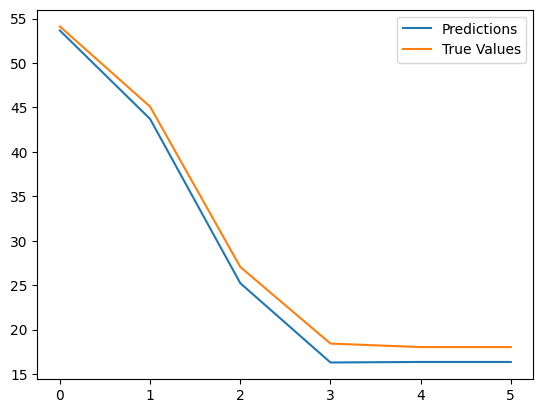

In [33]:
#plot the predicted vs true values for test data2
plt.plot(y_pred2, label="Predictions")
plt.plot(test_data2[label], label="True Values")
plt.legend()
plt.show()

In [35]:
mse_test = np.mean(((y_pred1 - test_data1[label])**2))
rmse_test = math.sqrt(mse_test)
print("Test data 1 RMSE", rmse_test)
mse_test = np.mean(((y_pred2 - test_data2[label])**2))
rmse_test = math.sqrt(mse_test)
print("Test data 2 RMSE", rmse_test)

Test data 1 RMSE 10.246317807531875
Test data 2 RMSE 1.6121556437889484


In [34]:
# save each test to a csv file with 2 columns: predicted and true
import pandas as pd

df = pd.DataFrame({'predicted': y_pred1, 'true': test_data1[label]})
df.to_csv('Data/phil_rangedata_pred1.csv', index=False)

df = pd.DataFrame({'predicted': y_pred2, 'true': test_data2[label]})
df.to_csv('Data/phil_rangedata_pred2.csv', index=False)






In [ ]:
predictor.leaderboard(test_data2, silent=True)